Shape: (503, 8)
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  
<class 'pandas.core.frame.DataFrame'>
Ra

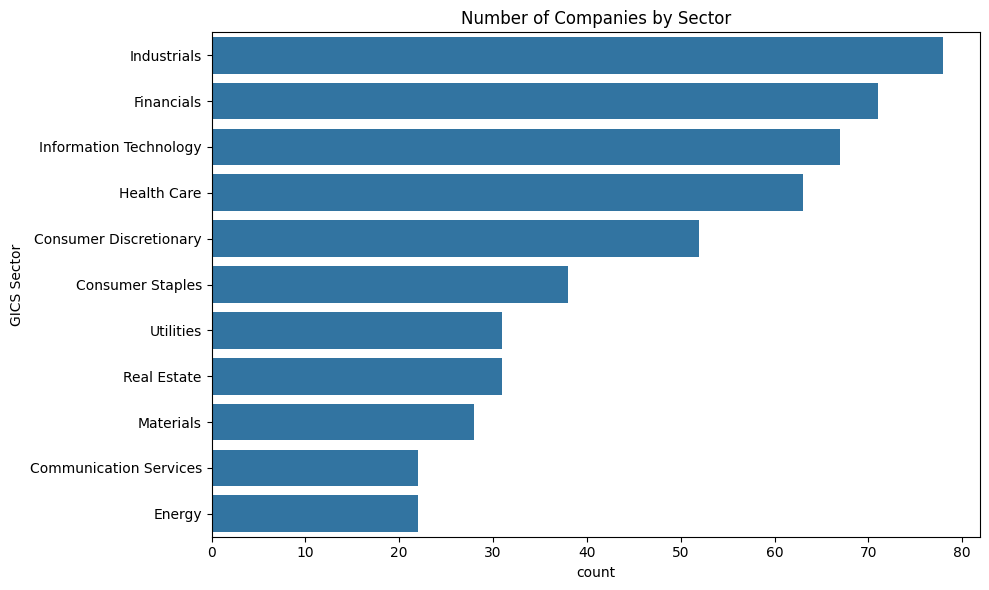

C:\Users\alokc\AppData\Local\Temp\ipykernel_18740\517019680.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sub_industries.values, y=top_sub_industries.index, palette='viridis')


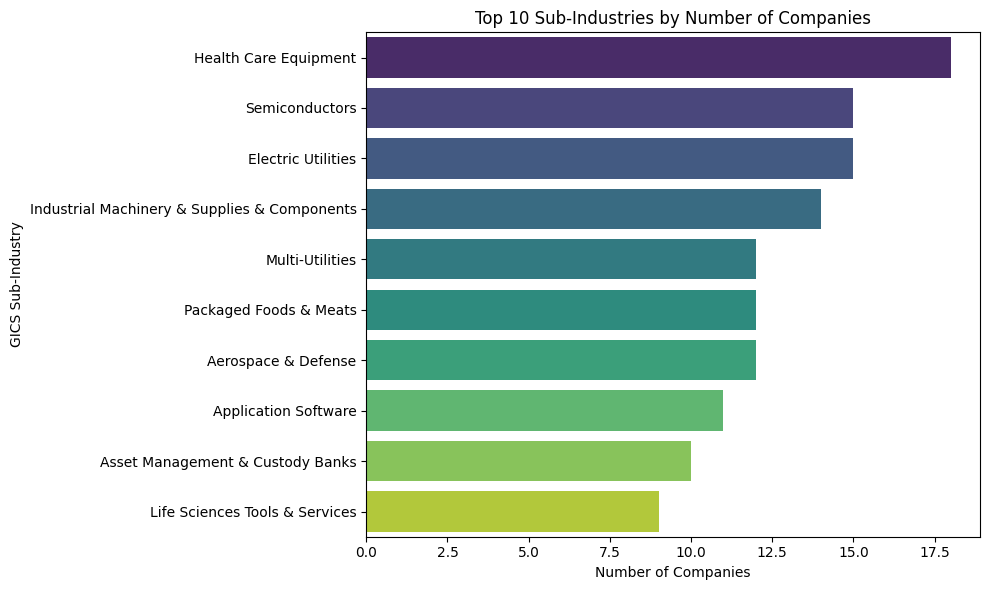

C:\Users\alokc\AppData\Local\Temp\ipykernel_18740\517019680.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hq.values, y=top_hq.index, palette='mako')


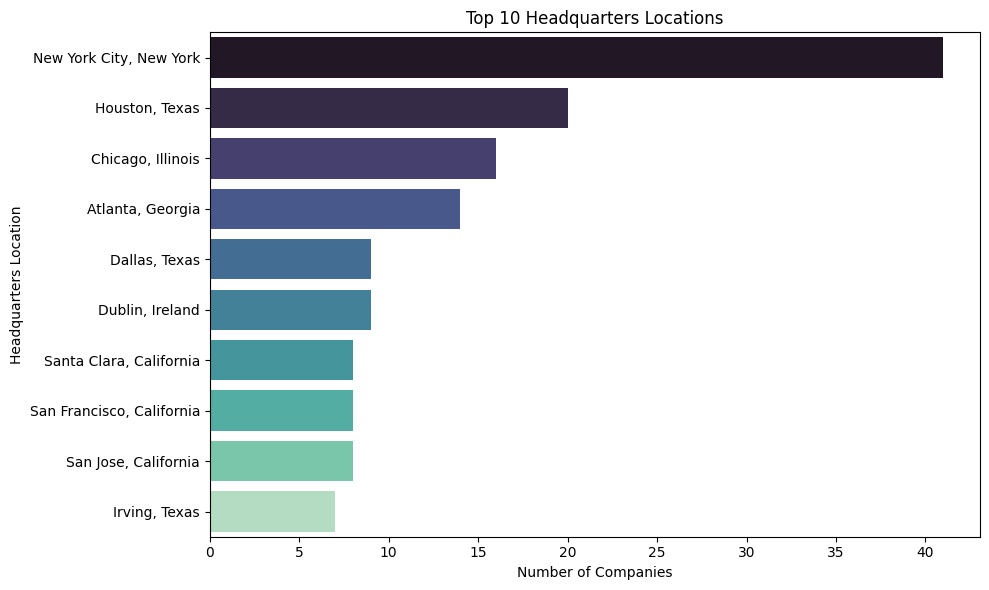

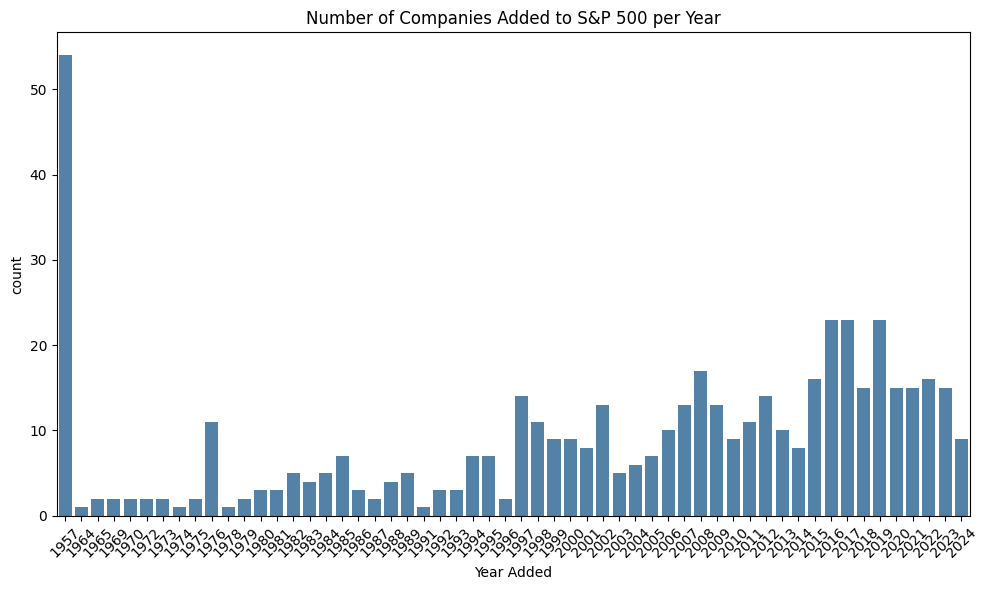

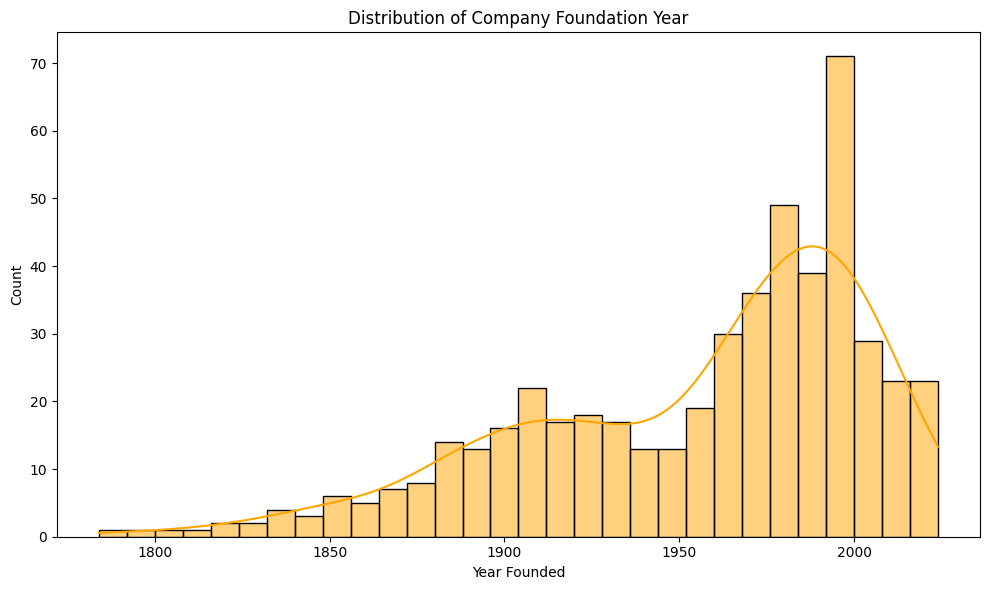


Top 10 Sub-Industries:
 GICS Sub-Industry
Health Care Equipment                           18
Semiconductors                                  15
Electric Utilities                              15
Industrial Machinery & Supplies & Components    14
Multi-Utilities                                 12
Packaged Foods & Meats                          12
Aerospace & Defense                             12
Application Software                            11
Asset Management & Custody Banks                10
Life Sciences Tools & Services                   9
Name: count, dtype: int64

Top 10 Headquarters Locations:
 Headquarters Location
New York City, New York      41
Houston, Texas               20
Chicago, Illinois            16
Atlanta, Georgia             14
Dallas, Texas                 9
Dublin, Ireland               9
Santa Clara, California       8
San Francisco, California     8
San Jose, California          8
Irving, Texas                 7
Name: count, dtype: int64

Companies Added Per

In [4]:
## Module 2: EDA on constituents.csv
#22BDS0226 PAYAL CHATTERJEE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

# 2. Display basic info
print("Shape:", df.shape)
print(df.head())
print(df.info())

# 3. Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# 4. Column overview
print("\nColumns:", df.columns.tolist())

# 5. --- EDA Plots ---

# 5.1 Company count by GICS Sector
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='GICS Sector', order=df['GICS Sector'].value_counts().index)
plt.title('Number of Companies by Sector')
plt.tight_layout()
plt.show()

# 5.2 Top 10 Sub-Industries by company count
top_sub_industries = df['GICS Sub-Industry'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_sub_industries.values, y=top_sub_industries.index, palette='viridis')
plt.title('Top 10 Sub-Industries by Number of Companies')
plt.xlabel('Number of Companies')
plt.tight_layout()
plt.show()

# 5.3 Top 10 Headquarters Locations
top_hq = df['Headquarters Location'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_hq.values, y=top_hq.index, palette='mako')
plt.title('Top 10 Headquarters Locations')
plt.xlabel('Number of Companies')
plt.tight_layout()
plt.show()

# 5.4 Companies added to S&P 500 per year
df['Year Added'] = pd.to_datetime(df['Date added'], errors='coerce').dt.year
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Year Added', color='steelblue')
plt.title('Number of Companies Added to S&P 500 per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.5 Companies founded per year (cleaned)
# Extract numeric year from 'Founded' column
df['Founded Year'] = df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Founded Year', bins=30, color='orange', kde=True)
plt.title('Distribution of Company Foundation Year')
plt.xlabel('Year Founded')
plt.tight_layout()
plt.show()

# 6. Summary Tables
print("\nTop 10 Sub-Industries:\n", top_sub_industries)
print("\nTop 10 Headquarters Locations:\n", top_hq)
print("\nCompanies Added Per Year:\n", df['Year Added'].value_counts().sort_index())
print("\nCompanies Founded Per Year:\n", df['Founded Year'].value_counts().sort_index())
